In [ ]:
import geopandas as gpd
import pandas as pd

# Load GBR shapefile
gbr_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\raw\shapefile_gbr\worldheritagemarineprogramme.shp"
gbr = gpd.read_file(gbr_path)

# Load SST anomaly data
csv_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\base\dhw_12weeks.csv"
sst_df = pd.read_csv(csv_path, skiprows=[1])

# Convert SST data to GeoDataFrame
sst_gdf = gpd.GeoDataFrame(
    sst_df,
    geometry=gpd.points_from_xy(sst_df['longitude'], sst_df['latitude']),
    crs="EPSG:4326"
)

# Spatial join: keep only points within GBR polygon
sst_within_gbr = gpd.sjoin(sst_gdf, gbr, predicate='within', how='inner')

# Compute average anomaly
mean_anomaly = sst_within_gbr['sea_surface_temperature_anomaly'].mean()

print(f"Average SST anomaly inside the GBR zone: {mean_anomaly:.4f}°C")


Average SST anomaly inside the GBR: 0.9241°C


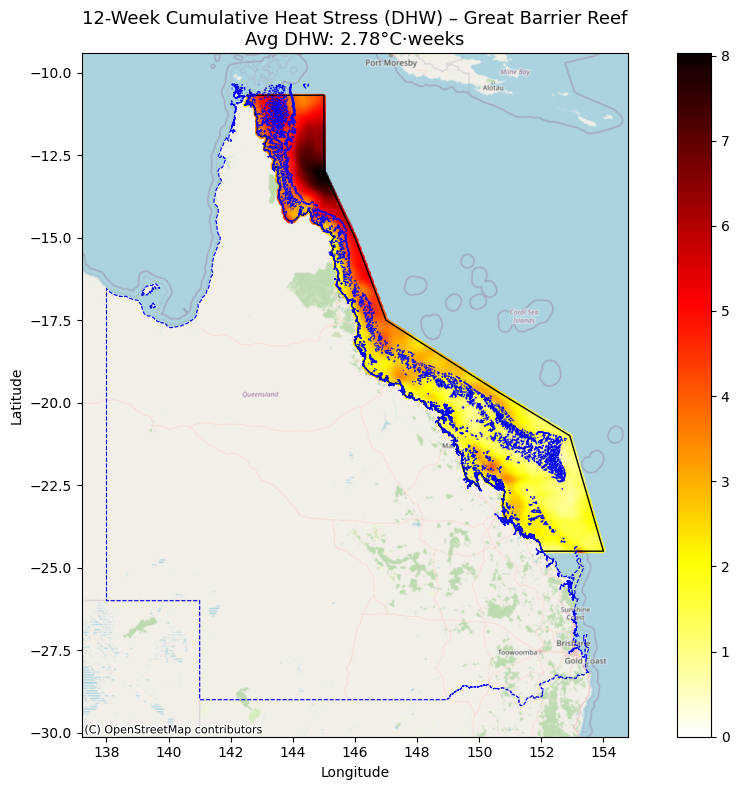

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Load GBR shapefile (main polygon)
gbr_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\raw\shapefile_gbr\worldheritagemarineprogramme.shp"
gbr = gpd.read_file(gbr_path).to_crs("EPSG:4326")

# Load GBR features shapefile
features_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\raw\shapefile_gbr2\Great_Barrier_Reef_Features.shp"
gbr_features = gpd.read_file(features_path).to_crs("EPSG:4326")

# Load SST anomaly data
csv_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\base\dhw_12weeks.csv"
sst_df = pd.read_csv(csv_path, skiprows=[1])

# Convert SST data to GeoDataFrame
sst_gdf = gpd.GeoDataFrame(
    sst_df,
    geometry=gpd.points_from_xy(sst_df['longitude'], sst_df['latitude']),
    crs="EPSG:4326"
)

# Spatial join: keep only points within GBR polygon
sst_within_gbr = gpd.sjoin(sst_gdf, gbr, predicate='within', how='inner')

# Compute average anomaly
mean_anomaly = sst_within_gbr['DHW'].mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot DHW points inside GBR
sst_within_gbr.plot(
    ax=ax,
    column='DHW',
    cmap='hot_r',
    legend=True,
    markersize=10,
    alpha=0.7
)

# Outline GBR region
gbr.boundary.plot(ax=ax, color='black', linewidth=1)

# Overlay additional GBR features
gbr_features.boundary.plot(ax=ax, color='blue', linewidth=0.8, linestyle='--')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=sst_gdf.crs)

# Titles and labels
ax.set_title(f"12-Week Cumulative Heat Stress (DHW) – Great Barrier Reef\nAvg DHW: {mean_anomaly:.2f}°C·weeks", fontsize=13)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


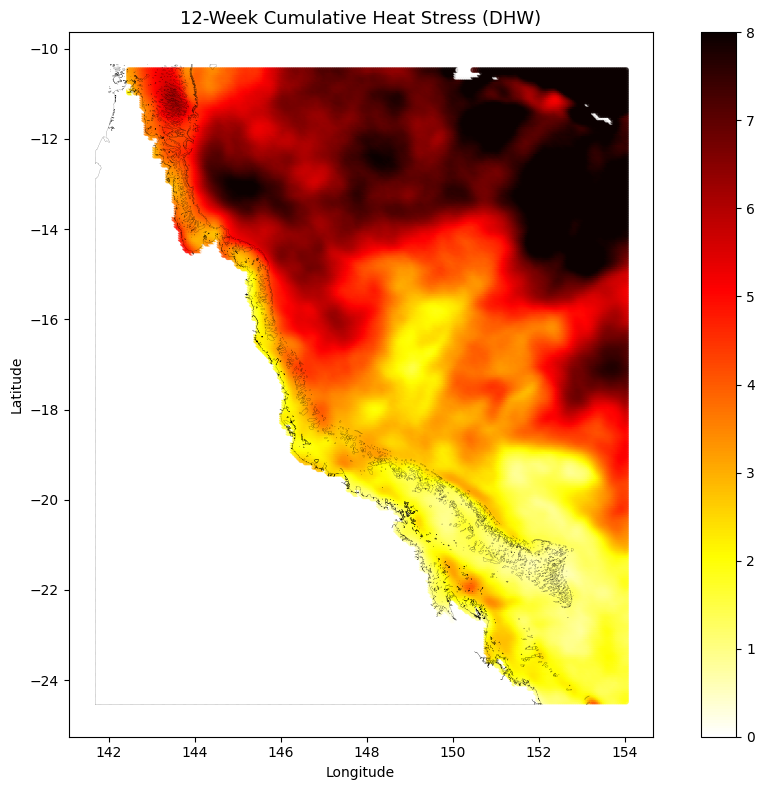

In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Load GBR features shapefile
features_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\raw\shapefile_gbr\Great_Barrier_Reef_Features.shp"
gbr_features = gpd.read_file(features_path).to_crs("EPSG:4326")

# Load SST anomaly data
csv_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\base\dhw_12weeks.csv"
sst_df = pd.read_csv(csv_path, skiprows=[1])

# Convert SST data to GeoDataFrame
sst_gdf = gpd.GeoDataFrame(
    sst_df,
    geometry=gpd.points_from_xy(sst_df['longitude'], sst_df['latitude']),
    crs="EPSG:4326"
)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Fixed DHW range based on scientific thresholds
vmin = 0
vmax = 8

sst_gdf.plot(
    ax=ax,
    column='DHW',
    cmap='hot_r',
    legend=True,
    markersize=10,
    alpha=0.7,
    vmin=vmin,
    vmax=vmax
)

# Outline GBR region and features
gbr_features.boundary.plot(ax=ax, color='black', linewidth=0.15, linestyle='--')

# Titles and labels
ax.set_title(f"12-Week Cumulative Heat Stress (DHW)", fontsize=13)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

output_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\output\dhw_map.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')